In [26]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import umap.umap_ as umap
import umap.plot
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
from sklearn.decomposition import PCA

In [3]:
# load data 

unk_data = pd.read_csv ("../data/scaled_data_dropUNK.csv", index_col=0)
y = pd.read_csv("../data/labels_dropUNK.csv", index_col = 0)
print(unk_data.shape)


(150, 717)


In [5]:
UMAP= umap.UMAP()
umap_red= UMAP.fit_transform(unk_data)

labels = y['Response'].values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)




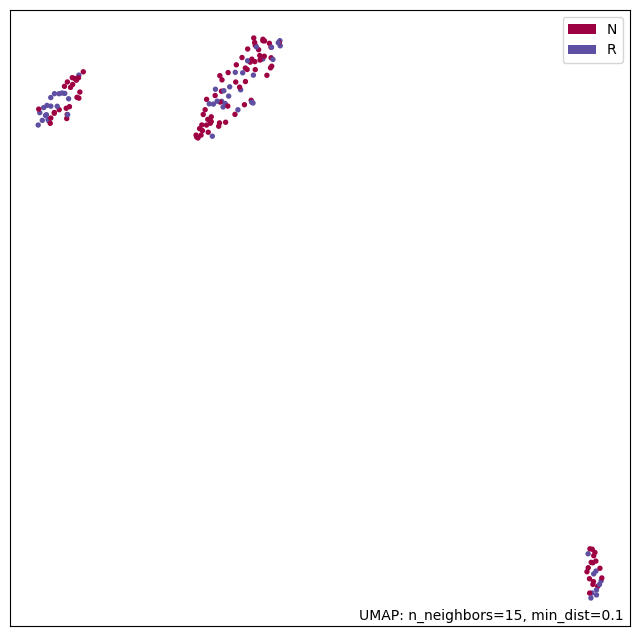

In [10]:
umap.plot.points(UMAP, labels = labels)
umap.plot.plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


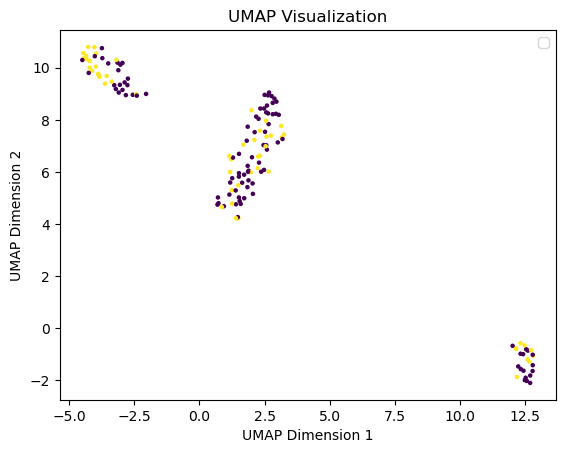

In [6]:
scatter = plt.scatter(umap_red[:, 0], umap_red[:, 1], c=labels_encoded, cmap='viridis', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Label 0', 'Label 1'], title='Labels')
plt.legend()
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [20]:
data = pd.read_csv ("../data/scaled_data_dropUNK.csv", index_col=0)
y = pd.read_csv("../data/labels_dropUNK.csv", index_col = 0)


In [23]:
# encode categorical labels to numerical codes
labels = y['Response'].values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(y)
print("Label Map:")
for encoded_value, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_value}: {original_label}")

Label Map:
0: N
1: R


/Users/eveyzheng/LMP1210_2024/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state=1210)

In [29]:
# fit PCA to data
pca = PCA(n_components=15)
pca.fit_transform(data)

array([[44.0957101 , -4.69124104, -2.44004714, ...,  0.93753924,
        -1.84988906,  1.59134455],
       [45.91170313, -1.3155348 , -0.56605953, ..., -2.19232397,
        -1.58795376,  0.95187201],
       [47.38128656, -5.45199829, -3.61948006, ..., -1.31514484,
         1.09825741,  2.81015608],
       ...,
       [-6.85138851,  2.34125569,  4.57488676, ..., -0.21369538,
        -3.45619751,  1.94413989],
       [-9.44454052, -1.68822738,  3.47603326, ..., -1.31719595,
        -0.37409186,  1.00897328],
       [-4.77441015,  4.22437492,  8.40299657, ...,  0.64958987,
         0.50118688, -0.81688532]])

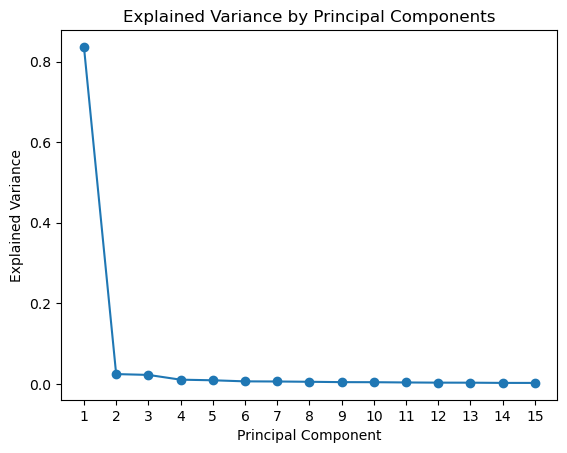

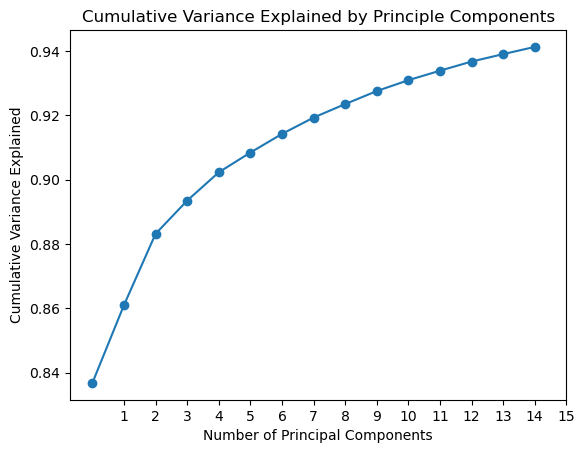

In [30]:
# use elbow method on variance explained to select optimal number of principal components
explained_variance = pca.explained_variance_ratio_

# plot explained variance against principal component
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# also check cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Variance Explained by Principle Components')
plt.xlabel('Number of Principal Components')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Cumulative Variance Explained') ;

In [21]:
grid_search = GridSearchCV(LogisticRegression(penalty="l1"), hyperparameters,  cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#best hyperparameters 
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
print("Best hyperparameters:", best_params)
print("Test set accuracy:", test_accuracy)
print("Training accuracy:", training_accuracy)

NameError: name 'hyperparameters' is not defined

should we do data and y or split training/test 

In [19]:
def L1_reg (C, solver):
    LR= LogisticRegression(C=C, solver = solver, penalty = "l1")
    LR.fit(X)Train, y)
    y_pred = LR.predict(X_train)
    print(f"C is {C}, solver is {solver}")
    print(classification_report (y, y_pred))
    
C_list = np.arange(0, 5, 0.1)
C_list= C_list.tolist()
for item in C_list:
    L1_reg(item, "liblinear")

/Users/eveyzheng/LMP1210_2024/.conda/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: b'C <= 0'

In [18]:
# to find the two populations 
filtered_points = [index for index, value in enumerate(umap_red[:, 0]) if value >10]
label_data = pd.read_csv ("../data/log2_data_v3.csv", index_col=0)
og_data_names = label_data.index[filtered_points].tolist()
# print(imputed_data.head())
# og_data_names = [PCA_mapping[index] for index in filtered_points]
print(len(og_data_names))
print(og_data_names)

25
['SRR7344546', 'SRR7344554', 'SRR7344556', 'SRR7344564', 'SRR7344565', 'SRR7344567', 'SRR7344574', 'SRR7344575', 'ERR2208929', 'ERR2208930', 'ERR2208931', 'ERR2208933', 'ERR2208934', 'ERR2208935', 'ERR2208936', 'ERR2208938', 'ERR2208939', 'ERR2208940', 'ERR2208941', 'ERR2208942', 'ERR2208943', 'ERR2208945', 'ERR2208946', 'ERR2208948', 'ERR2208949']
